# Predicting Newsletter Subscription Using Age and Hours Played

## 1. Data Description

Both datasets, comprised of user input and system information from the PLAICraft server, were collected by a UBC Computer Science research group led by Frank Wood. 

### Players
`players.csv`consists of user data with 196 observations and 7 variables:

|<strong>Variable         | Data Type | Variable Definition</strong>                       |
|:------------------------|:----------|:---------------------------------------------------|
| `experience`            | chr       | Player's experience level                          |
| `subscribe`             | lgl       | If player has subscribed to the game newsletter    |
| `hashedEmail`           | chr       | Player's unique hashed email                       |
| `played_hours`          | dbl       | Hours  player has played on the PLAICraft server   |
| `name`                  | chr       | Player's name                                      |
| `gender`                | chr       | Player's gender                                    |
| `Age`                   | dbl       | Player's age                                       |


Potential issues include the 2 missing values (NA) in `Age`, as well as the outliers and large range of numeric values in `played_hours` and `Age`. 



## 2. Questions
<p>I will be addressing question 1:</p><p><em>What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?</em></p>

To explore this, my question is:
<strong>Can age and hours played predict if a player will subscribe to a game newsletter?</strong></em><p>

This will address whether age characteristics and playtime behaviours can effectively predict the newsletter subscription status of a player, using the age ranges and playtime hours of subscribing and non-subscribing player types. To make predictions with the data, we must select our explanatory and predictor variables and convert the explanatory variable into a factor. 


## 3. Exploratory Data Analysis and Visualization

In [1]:
# Run cell to import all libraries
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Loading in the data
players_url <- "https://raw.githubusercontent.com/echen504/dsci-100-25w2-grp29/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/echen504/dsci-100-25w2-grp29/refs/heads/main/sessions.csv"

players_raw <- read_csv(players_url)
sessions_raw <- read_csv(sessions_url)

# Both datasets are tidy and require no additional tidying

# Wrangling the dataset that will be used in this project
players <- players_raw |>
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscriber" = "TRUE", "Non-Subscriber" = "FALSE")) 

head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
Subscriber,30.3,9
Subscriber,3.8,17
Non-Subscriber,0.0,17
Subscriber,0.7,21
Subscriber,0.1,21
Subscriber,0.0,17


### Summary Statistics

In [3]:
# Only summarizing players.csv for this project
players_max <- players |>
    select(played_hours, Age) |>
    map_df(max, na.rm = TRUE)

players_min <- players |>
    select(played_hours, Age) |>
    map_df(min, na.rm = TRUE)

players_avg <- players |>
    select(played_hours, Age) |>
    map_df(mean, na.rm = TRUE)

players_median <- players |>
    select(played_hours, Age) |>
    map_df(median, na.rm = TRUE)

|Summary Statistic| Hours Played | Age    |
|:---------------:|:------------:|:------:|
|Max              |223.1         |50      |
|Min              |0             |8       |
|Mean             |5.845918      |20.52062|
|Median           |0.1           |19      |

### Visualizing the Data

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


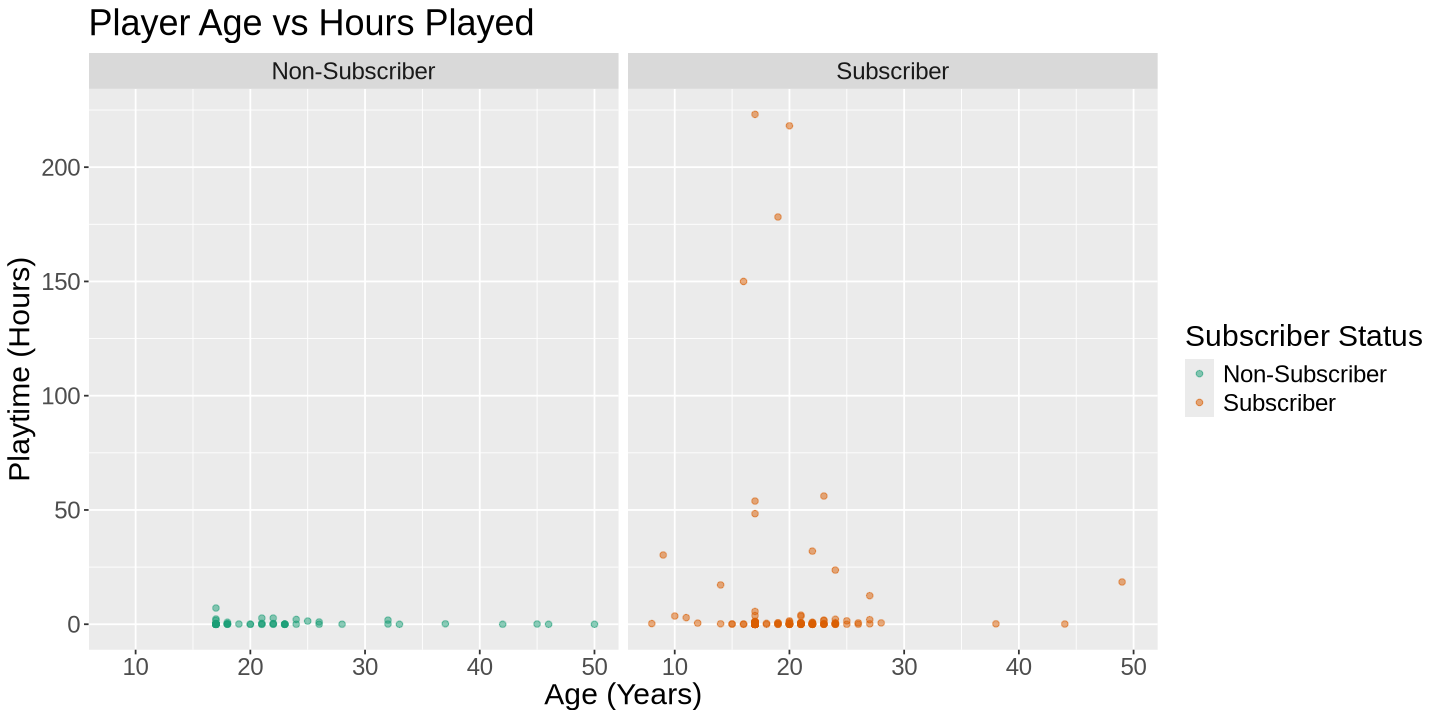

In [4]:
options(repr.plot.height = 6, repr.plot.width = 12)

# Visualizing Player Age vs. Hours Played
players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (Years)",
         y = "Playtime (Hours)",
         title = "Player Age vs Hours Played",
         color = "Subscriber Status") +
    theme(text = element_text(size = 18)) +
    scale_color_brewer(palette = "Dark2") +
    facet_grid(cols = vars(subscribe))
players_plot

Graph 1: Plots were separated by subscriber class due to the heavy clustering of points at the bottom. Data should be standardized due to the large difference in axes scales. It is important to notice that there are some outliers in the data.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


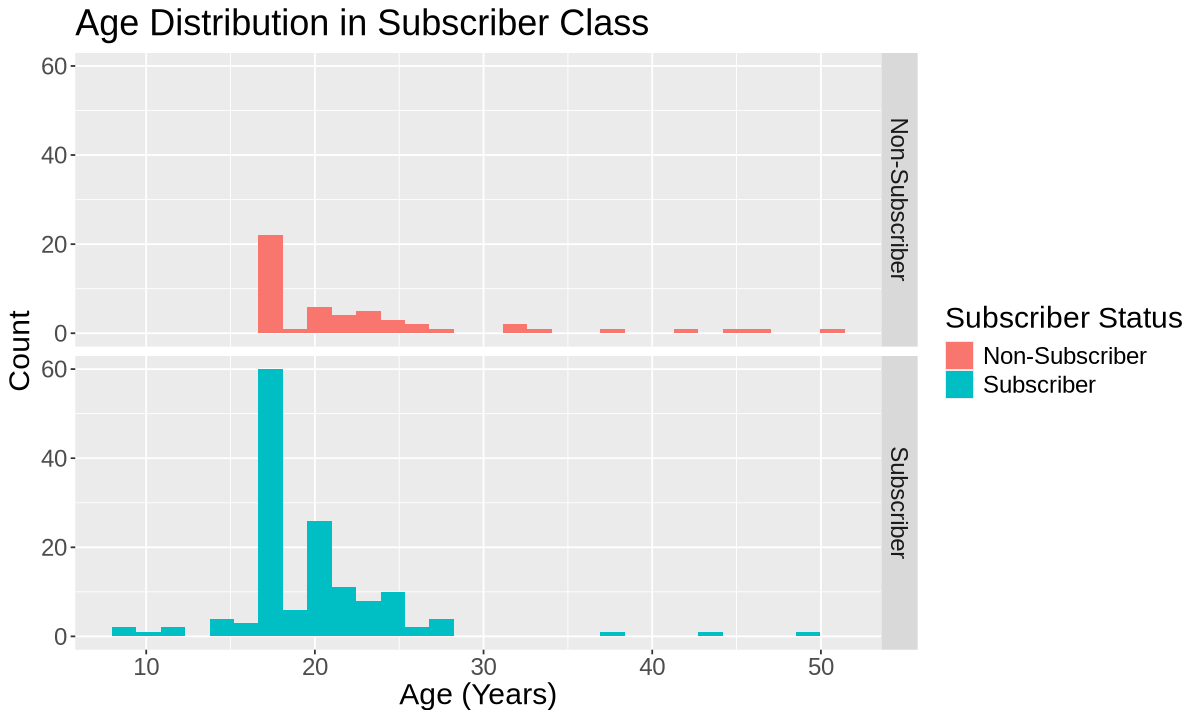

In [5]:
options(repr.plot.height = 6, repr.plot.width = 10)

# Visualizing the distribution of Subscriber vs. Non-subscriber ages
age_histogram <- players |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(bins = 30) +
    labs(x = "Age (Years)",
         y = "Count",
         title = "Age Distribution in Subscriber Class",
         fill = "Subscriber Status") +
    theme(text = element_text(size = 18)) +
    facet_grid(rows = vars(subscribe))
age_histogram

Graph 2: There appears to be a class imbalance in `subscribe` that must be balanced before the prediction. Ages for both classes show a similar distribution.

subscribe,avg_time
<fct>,<dbl>
Non-Subscriber,0.5019231
Subscriber,7.7756944


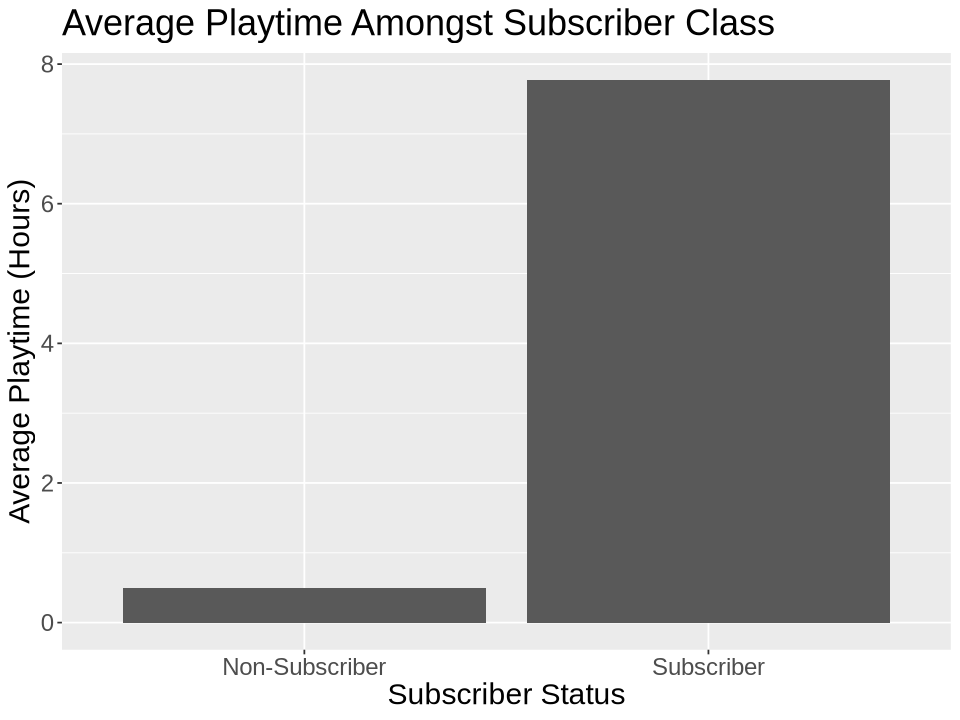

In [6]:
options(repr.plot.height = 6, repr.plot.width = 8)

# Visualizing the average playtime between Subscriber vs. Non-Subscriber
avg_playtime <- players |>
    group_by(subscribe) |>
    summarize(avg_time = mean(played_hours))
avg_playtime

playtime_plot <- avg_playtime |>
    ggplot(aes(x = subscribe, y = avg_time)) +
    geom_bar(stat = "identity") +
    labs(x = "Subscriber Status",
         y = "Average Playtime (Hours)",
         title = "Average Playtime Amongst Subscriber Class",
         fill = "Subscriber Status") +
    theme(text = element_text(size = 18))
playtime_plot

Graph 3: There is a higher playtime average if the player is subscribed to the newsletter. It is important to note that outliers and unequal class sizes affect averages. 

## 4. Methods

I will use a <strong>K-nearest neighbours classification</strong> because we are predicting the `subscribe` class using variables `Age` and `played_hours`.

#### Assumptions¶
- Missing data and outliers will be accounted for prior to the classification
- Enough observations for adequate train/test split

#### Limitations of KNN
- Slower with large training sets
- Noise-sensitive (ex. outliers)
- Performs poorly with class imbalance

#### Select Model & Process Data
<ol>
  <li>Split data into training (75%) and testing (25%) groups</li>
  <li>Create a recipe
    <ul>
      <li>Standardize variables</li>
      <li>Balance classes</li>
    </ul>
  </li>
  <li>Use 5-fold cross-validation on the training set</li>
    <ul>
      <li>Select the best K</li>
    </ul>
  <li>Set up classification model and workflow using K</li>
    
  <li>Use the model to predict subscribe class using test data</li>
  <li>Evaluate model</li>
  <ul>
      <li>Compute accuracy</li>
      <li>Report confusion matrix</li>
    </ul>
</ol>